In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_excel('../datasets/onlineretail/Online Retail.xlsx')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Check For Null values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Dropping rows with no customer id since we cannot impute them on our own
data = data.dropna(subset=['CustomerID'])

In [7]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
data.shape

(406829, 8)

In [9]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(5225)

In [11]:
# also drop duplicate rows
data = data.drop_duplicates()

In [12]:
data.shape

(401604, 8)

In [13]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [14]:
data['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2058
REGENCY CAKESTAND 3 TIER               1894
JUMBO BAG RED RETROSPOT                1659
PARTY BUNTING                          1409
ASSORTED COLOUR BIRD ORNAMENT          1405
                                       ... 
LETTER "W" BLING KEY RING                 1
CROCHET LILAC/RED BEAR KEYRING            1
MIDNIGHT BLUE CRYSTAL DROP EARRINGS       1
BLACK VINT ART DEC CRYSTAL BRACELET       1
WHITE STONE/CRYSTAL EARRINGS              1
Name: count, Length: 3896, dtype: int64

In [15]:
unique_descriptions = data['Description'].unique()

In [16]:
len(unique_descriptions)

3896

In [17]:
data['Quantity'].value_counts()

Quantity
 1        69605
 12       59828
 2        57425
 6        37480
 4        32093
          ...  
 234          1
 1404         1
 698          1
 80995        1
-80995        1
Name: count, Length: 436, dtype: int64

In [18]:
unique_qty = data['Quantity'].unique()

In [19]:
len(unique_qty)

436

In [20]:
unique_qty

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

In [21]:
data.shape

(401604, 8)

In [22]:
# Removing negative Qty
data = data[data['Quantity']>0]

In [23]:
data.shape

(392732, 8)

In [24]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [25]:
data['Country'].value_counts()

Country
United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [26]:
countries = data['Country'].unique()

In [27]:
countries

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [28]:
len(countries)

37

In [29]:
country_data = data.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)

In [30]:
country_data.head()

Country
United Kingdom    349227
Germany             9027
France              8327
EIRE                7228
Spain               2480
Name: InvoiceNo, dtype: int64

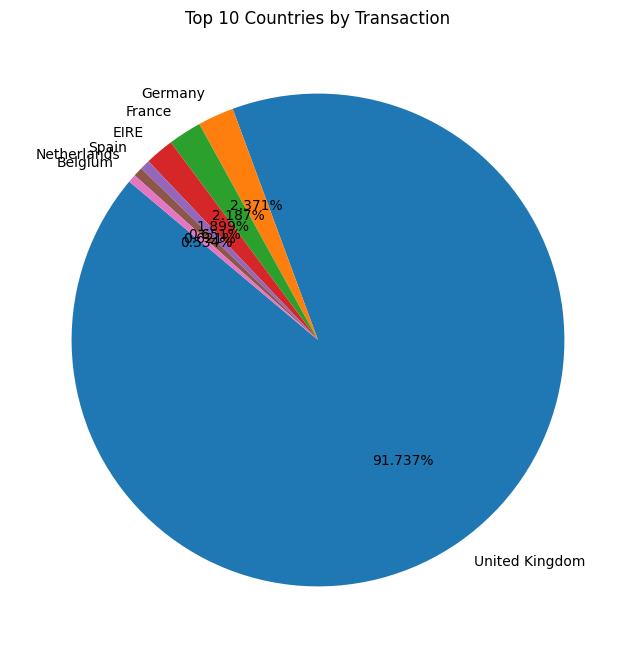

In [31]:
# Top 10 Country
top_7_country = country_data.head(7)
plt.figure(figsize=(8,8))
plt.pie(top_7_country,labels=top_7_country.index,autopct='%1.3f%%',startangle=140)

plt.title("Top 10 Countries by Transaction")
plt.show()

RFM features

In [32]:
data['Monetary'] = data['Quantity'] * data['UnitPrice']

In [33]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [34]:
reference_date = data['InvoiceDate'].max()

In [35]:
reference_date

Timestamp('2011-12-09 12:50:00')

In [36]:
# grouping 
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate':lambda x : (reference_date-x.max()).days,
    'InvoiceNo':'count',
    'Monetary':'sum'
})

In [37]:
rfm.columns = ['Recency','Frequency','Monetary']

In [38]:
rfm = rfm.reset_index()

In [39]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


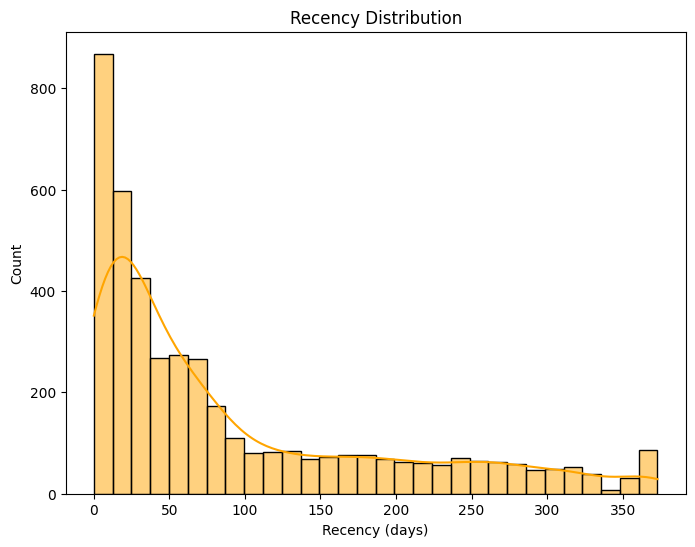

In [40]:
# Recency Distribution
plt.figure(figsize=(8,6))
sns.histplot(rfm['Recency'],kde=True,bins=30,color='orange')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Count')
plt.show()

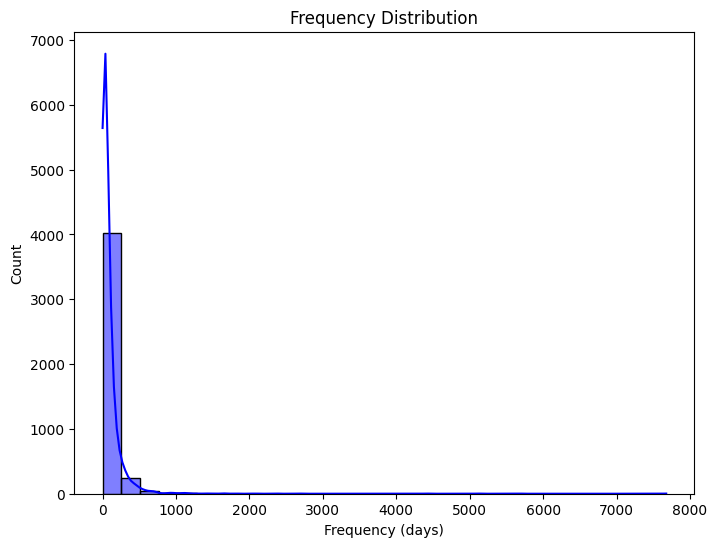

In [41]:
# Frequency Distribution
plt.figure(figsize=(8,6))
sns.histplot(rfm['Frequency'],kde=True,bins=30,color='blue')
plt.title('Frequency Distribution')
plt.xlabel('Frequency (days)')
plt.ylabel('Count')
plt.show()

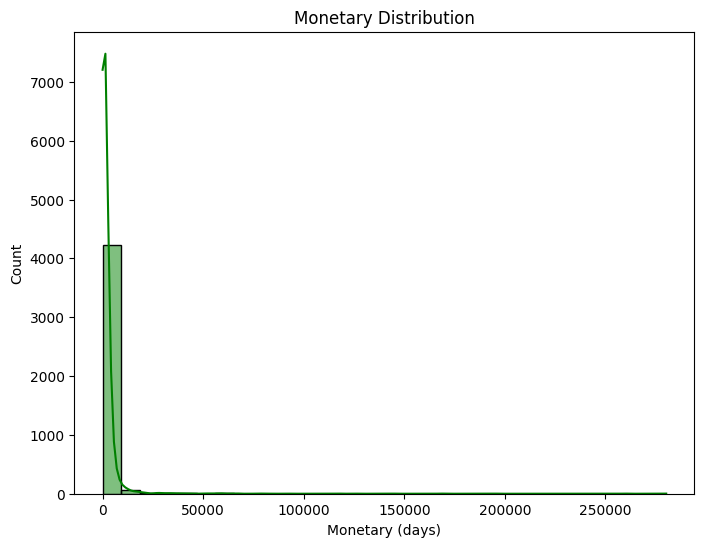

In [42]:
# Monetary Distribution
plt.figure(figsize=(8,6))
sns.histplot(rfm['Monetary'],kde=True,bins=30,color='green')
plt.title('Monetary Distribution')
plt.xlabel('Monetary (days)')
plt.ylabel('Count')
plt.show()

In [43]:
# Scaling the data to reduce skewness

rfm['Recency'] = np.log1p(rfm['Recency'])

In [44]:
rfm['Frequency'] = np.log1p(rfm['Frequency'])

In [45]:
rfm['Monetary'] = np.log1p(rfm['Monetary'])

In [46]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,5.786897,0.693147,11.253955
1,12347.0,0.693147,5.209486,8.368925
2,12348.0,4.317488,3.465736,7.494564
3,12349.0,2.944439,4.304065,7.472245
4,12350.0,5.736572,2.890372,5.815324
...,...,...,...,...
4334,18280.0,5.627621,2.397895,5.201806
4335,18281.0,5.198497,2.079442,4.404522
4336,18282.0,2.079442,2.564949,5.187665
4337,18283.0,1.386294,6.582025,7.623901


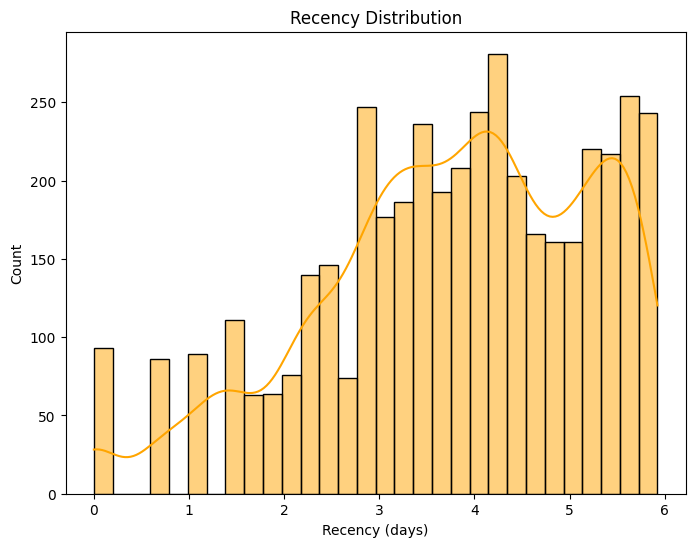

In [47]:
# Recency Distribution after scaling
plt.figure(figsize=(8,6))
sns.histplot(rfm['Recency'],kde=True,bins=30,color='orange')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Count')
plt.show()

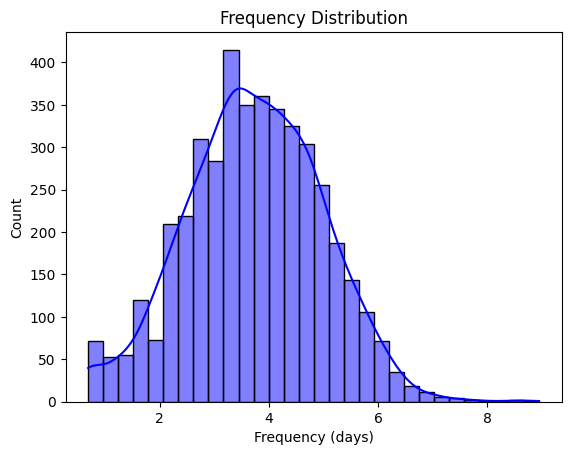

In [48]:
# Frequency Distribution after scaling
## plt.figure(figsize=(8,6))
sns.histplot(rfm['Frequency'],kde=True,bins=30,color='blue')
plt.title('Frequency Distribution')
plt.xlabel('Frequency (days)')
plt.ylabel('Count')
plt.show()

In [49]:
scaler = StandardScaler()

In [50]:
rfm_scaled = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])

In [51]:
rfm_scaled

array([[ 1.41013769, -2.43663517,  3.69768662],
       [-2.14641051,  1.18886461,  1.41181999],
       [ 0.38416966, -0.21093425,  0.71904602],
       ...,
       [-1.1784748 , -0.93404238, -1.10875557],
       [-1.66244265,  2.29067291,  0.8215225 ],
       [-0.00424065,  0.42881405,  0.73649444]])

In [52]:
# Clustering

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

In [53]:
# plot elbow curve

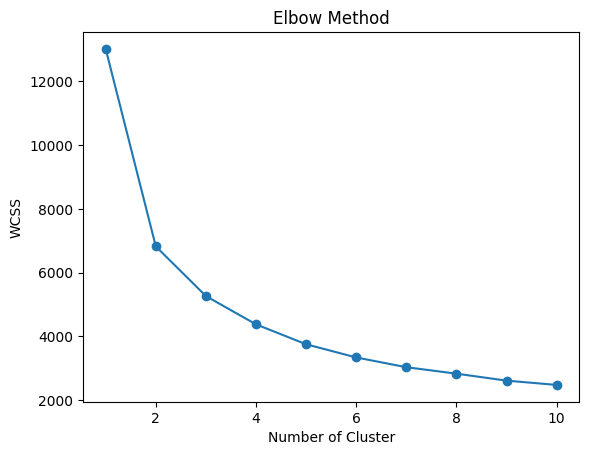

In [54]:
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [55]:
kmeans = KMeans(n_clusters=6,random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [56]:
cluster_analysis = rfm.groupby('Cluster').mean()
cluster_analysis

,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,15427.204161,3.340109,2.978293,5.758783
1,15156.213531,1.887379,5.660553,8.695875
2,15232.885196,3.871146,4.546830,7.379500
3,15452.638801,5.186722,1.974754,5.012371
4,15237.659664,5.062439,3.414468,6.211731
5,15298.333977,1.801264,4.232902,6.988951


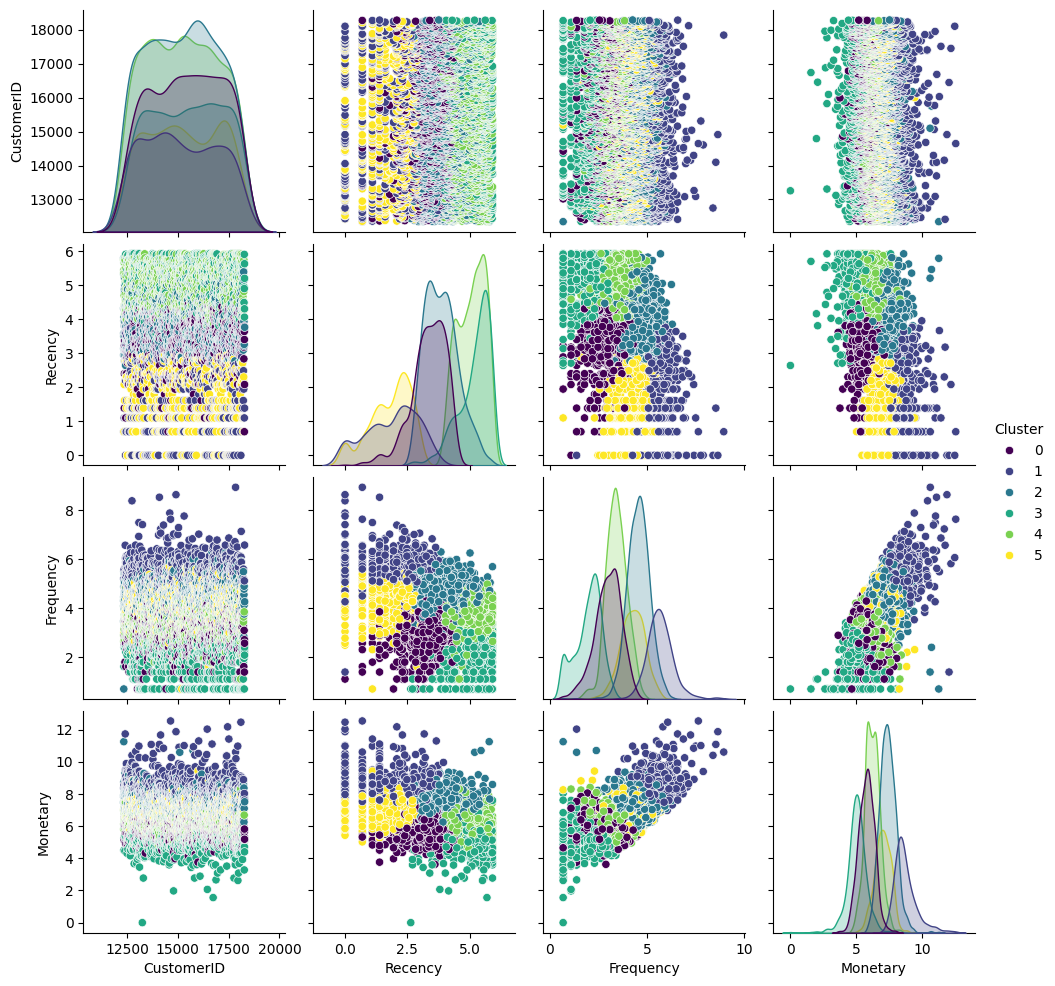

In [57]:
sns.pairplot(rfm,hue='Cluster',palette='viridis')
plt.show()